<a href="https://colab.research.google.com/github/mavischi/Prediction-of-quality-of-Wine/blob/main/Project_02_Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備環境

In [1]:
import numpy as np
import pandas as pd
import warnings

# 隱藏 FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 觀察資料

In [3]:
for c in df.columns:
  print(c)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


# 檢視資料中的數值欄位值的範圍是否相同

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* fixed acidity 固定酸度: 大多數與葡萄酒有關的酸或固定的或非揮發性的（不易蒸發）<br>
* volatile acidity 揮發酸度: 葡萄酒中乙酸的含量，含量過高會導致令人不愉快的醋味<br>
* citric acid 檸檬酸: 少量檸檬酸可以為葡萄酒增添「新鮮度」和風味<br>
* residual sugar 殘糖: 發酵停止後剩餘的糖分含量，很少有低於 1 克/公升的葡萄酒，大於 45 克/公升的葡萄酒被認為是甜的<br>
* chlorides 氯化物: 酒中的鹽含量<br>
* free sulfur dioxide 遊離二氧化硫: 遊離形式的 SO2 存在於分子 SO2（作為溶解氣體）和亞硫酸氫根離子之間的平衡狀態；它可以防止微生物生長和葡萄酒氧化<br>
* total sulfur dioxide 總二氧化硫: 遊離形式和結合形式的 S02 的量；在低濃度下，SO2 在葡萄酒中幾乎檢測不到，但當遊離 SO2 濃度超過 50 ppm 時，SO2 在葡萄酒的鼻子和味道中變得明顯<br>
* density 密度: 水的密度接近水的密度，取決於酒精百分比和糖含量<br>
* pH: 描述葡萄酒的酸性或鹼性程度，範圍從 0（非常酸性）到 14（非常鹼性）；大多數葡萄酒的 pH 值在 3-4 之間<br>
* sulphates 硫酸鹽: 一種葡萄酒添加劑，可提高二氧化硫氣體 (S02) 水平，並起到抗菌和抗氧化劑的作用<br>
* alcohol 酒精 <br>
* quality 品質 <br>

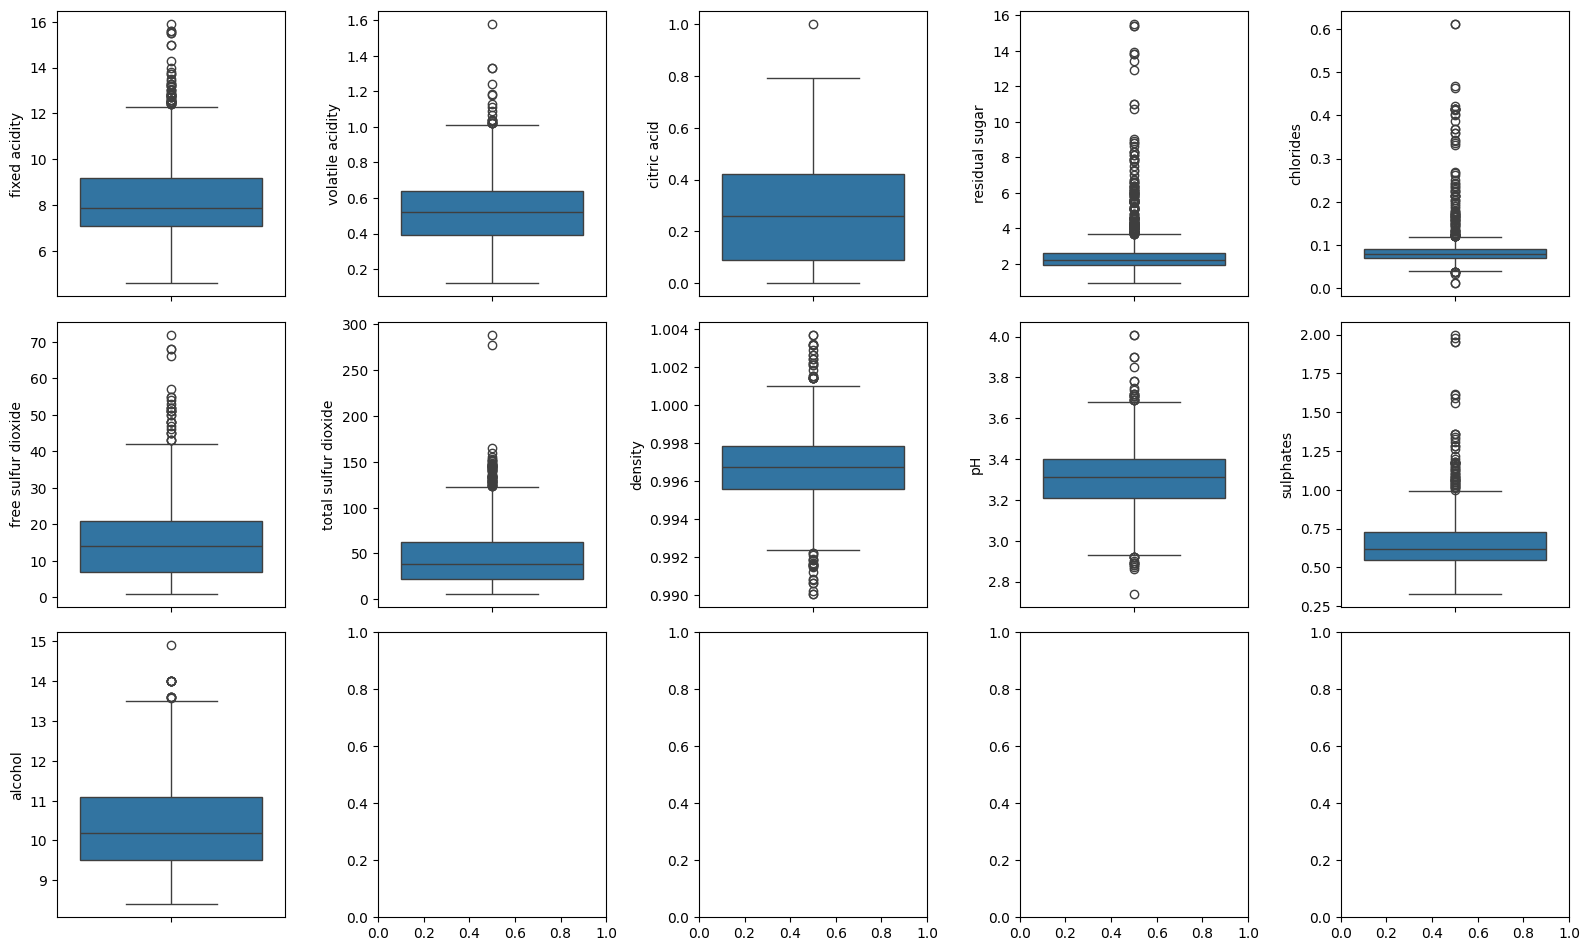

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']

n_rows = 3
n_cols = 5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*3.2))

for r in range(0,n_rows):
  for c in range(0, n_cols):
    i = r * n_cols + c
    if i < 11:
      ax = axs[r][c]
      sns.boxplot(data=df, y=df[cols[i]], ax=ax)
      ax.set_title = cols[i]
plt.tight_layout()
plt.show()

### 觀察數值欄位與 quality 間的關係
fixed acidity, density, pH 對於 quality 較沒有區別性<br>
品質越高的酒 citric acid 含量較高<br>
品質越高的酒 volatile acidity 值越低

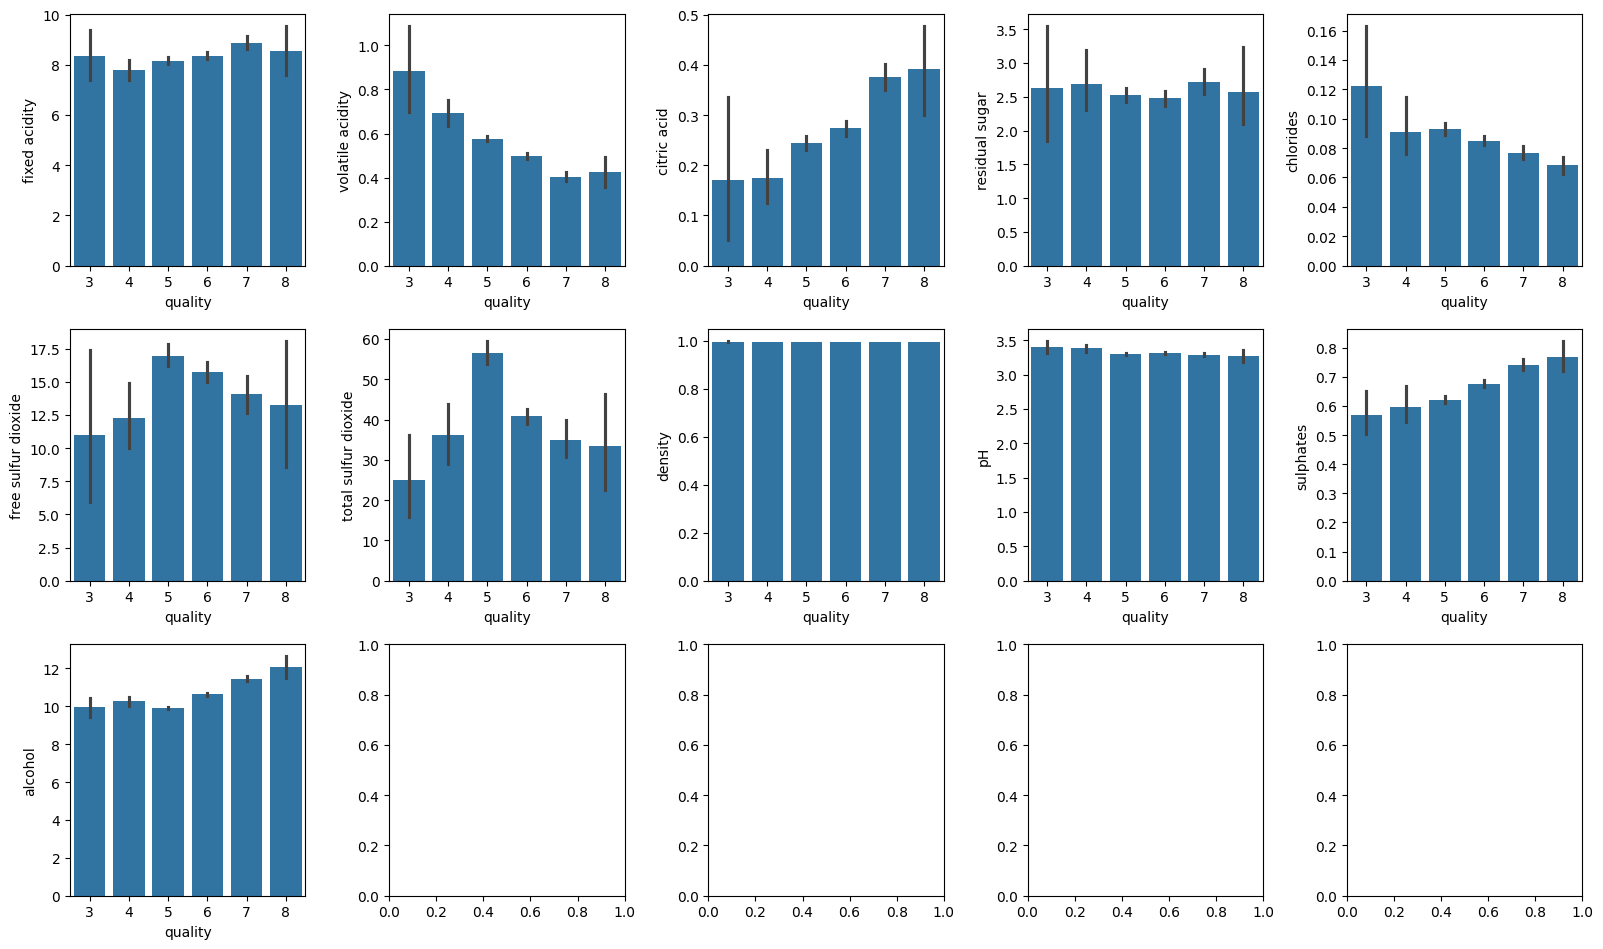

In [6]:
n_rows = 3
n_cols = 5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*3.2))

for r in range(0,n_rows):
  for c in range(0, n_cols):
    i = r * n_cols + c
    if i < 11:
      ax = axs[r][c]
      sns.barplot(x=df['quality'], y=df[cols[i]], ax=ax)
      ax.set_title = cols[i]
plt.tight_layout()
plt.show()

### 觀察特徵間的關係程度

<Axes: >

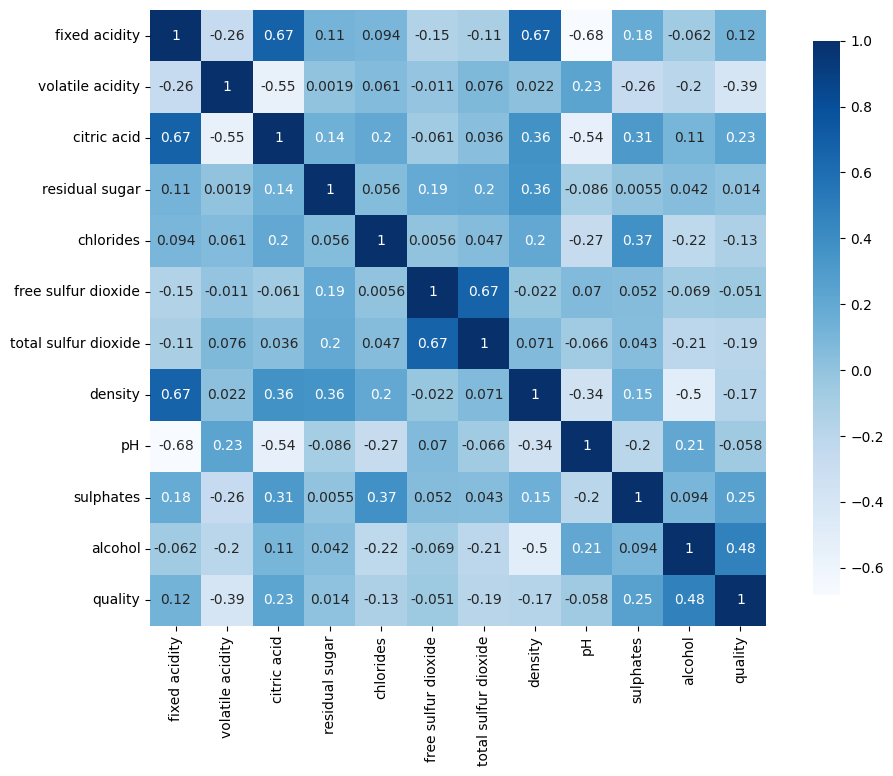

In [7]:
corr = df.corr()
sns.heatmap(
    corr,
    cmap='Blues',
    square=True,
    annot=True,
    ax = plt.subplots(figsize=(12, 8))[1],
    cbar_kws={ 'shrink' : .9 },
)

### 觀察資料不平衡的狀態

<Axes: xlabel='quality'>

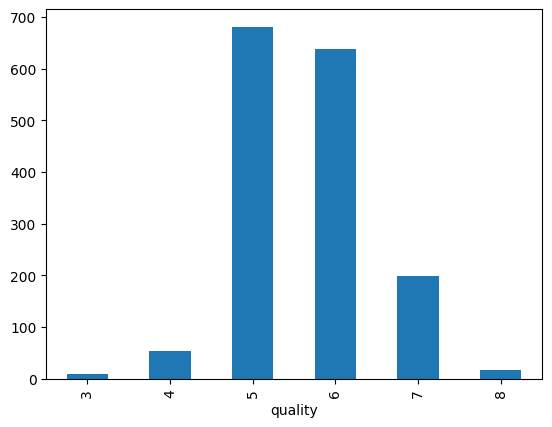

In [8]:
groups = df.groupby('quality').size()
groups.plot.bar()

# 資料清理

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# 資料工程

### 抽取新特徵
根據 [Santa Rosa article](http://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf) 酒的品質越高，free sulfur dioxide 濃度越高

In [11]:
df['mso2'] = df['free sulfur dioxide'] / (1+10**df['pH']-1.81)

用 quality 針對 mso2 進行分類，並取得每一項品質分數中的 mso2 平均

<Axes: xlabel='quality'>

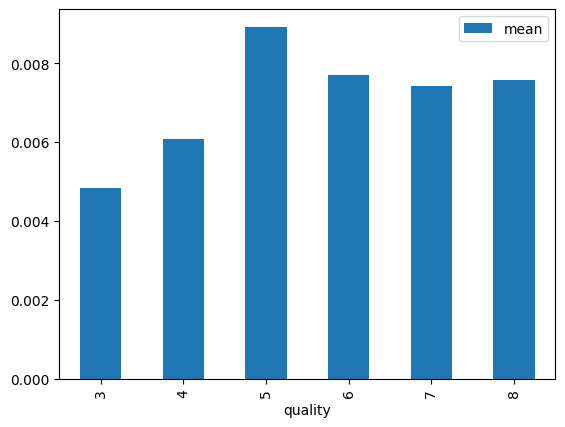

In [12]:
df.groupby('quality')['mso2'].aggregate(['mean']).plot.bar()

### Normalization 資料正規化

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_columns = df.columns.difference(['quality'])
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mso2
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.741663
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,1.203486
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,0.019725
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,0.572854
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.741663


### 資料型態轉換

In [15]:
bins = (0, 6.5, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mso2
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,bad,-0.741663
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,bad,1.203486
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,bad,0.019725
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,bad,0.572854
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,bad,-0.741663


In [16]:
df['quality'] = df['quality'].map({'bad':0, 'good':1})

<Axes: xlabel='quality'>

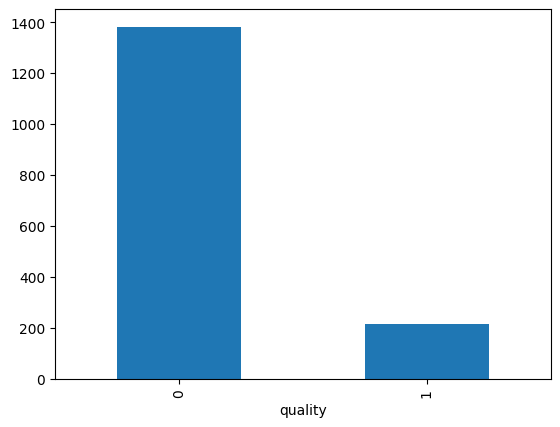

In [17]:
df['quality'].value_counts().plot.bar()

# Baseline 版本

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [37]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=43, stratify=y_train)

In [27]:
display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

(1151, 12)

(320, 12)

(128, 12)

In [28]:
y_val.value_counts()

,count
quality,
0,111
1,17


In [29]:
y_train.value_counts()

,count
quality,
0,994
1,157


In [48]:
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc_eval = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5)
print(rfc_eval)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

[0.91341991 0.9        0.88695652 0.89565217 0.93043478]


模型表現

In [40]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       277
           1       0.85      0.40      0.54        43

    accuracy                           0.91       320
   macro avg       0.88      0.69      0.74       320
weighted avg       0.90      0.91      0.89       320



In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(pred_clf)

模型表現

In [43]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       277
           1       0.48      0.26      0.33        43

    accuracy                           0.86       320
   macro avg       0.69      0.61      0.63       320
weighted avg       0.84      0.86      0.84       320



# 超參數優化

In [ ]:
rfc = RandomForestClassifier(random_state=42)
Parameters = {
    'max_depth':[5, 10, 20],
    'n_estimators':[10, 50, 100, 150]
}

cv = RandomizedSearchCV(rfc, Parameters, cv=5)
cv.fit(X_train, y_train)

In [50]:
pred_clf = cv.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       277
           1       0.72      0.49      0.58        43

    accuracy                           0.91       320
   macro avg       0.82      0.73      0.77       320
weighted avg       0.90      0.91      0.90       320



In [52]:
cv.best_params_

{'n_estimators': 50, 'max_depth': 20}

# PyTorch

In [60]:
import torch

# 創建模型
class Model(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super(Model, self).__init__()
    self.hidden1 = torch.nn.Linear(input_size,64)
    self.hidden2 = torch.nn.Linear(64, 32)
    self.predict = torch.nn.Linear(32, output_size)

  def forward(self, x):
    output1 = torch.relu(self.hidden1(x))
    output2 = torch.relu(self.hidden2(output1))
    output = torch.sigmoid(self.predict(output2))
    return output

# 模型優化初始化
model = Model(X_test.shape[1], 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.BCELoss()

# 資料格式轉為 torch 專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32)
y_data = torch.tensor(np.expand_dims(y_train, axis=1), dtype=torch.float32)

x_val_data = torch.tensor(X_val.values, dtype=torch.float32)
y_val_data = torch.tensor(np.expand_dims(y_val, axis=1), dtype=torch.float32)

x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_test_data = torch.tensor(np.expand_dims(y_test, axis=1), dtype=torch.float32)

batch_size = 32
num_epochs = 200

training_losses = []
val_losses = []

for epoch in range(num_epochs):
  for i in range(0, len(x_data), batch_size):
    prediction = model(x_data[i:i+batch_size])
    loss = loss_func(prediction, y_data[i:i+batch_size])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  loss = loss_func(model(x_data), y_data)
  training_losses.append(float(loss))

  y_pred = model(x_val_data)
  val_loss = loss_func(y_pred, y_val_data)
  print('training_losses:{}, val loss:{}, val acc:{}'.format(float(loss), val_loss, accuracy_score(y_val_data, np.where(y_pred >= 0.5, 1, 0))))

  val_losses.append(float(val_loss))

training_losses:0.4966297447681427, val loss:0.4919176399707794, val acc:0.8671875
training_losses:0.40954259037971497, val loss:0.4026779234409332, val acc:0.8671875
training_losses:0.36997655034065247, val loss:0.36373186111450195, val acc:0.8671875
training_losses:0.3425256609916687, val loss:0.3383803367614746, val acc:0.8671875
training_losses:0.322629451751709, val loss:0.31947919726371765, val acc:0.8671875
training_losses:0.30793142318725586, val loss:0.3061161935329437, val acc:0.8671875
training_losses:0.2965969443321228, val loss:0.29671043157577515, val acc:0.8671875
training_losses:0.2880323827266693, val loss:0.2897258400917053, val acc:0.8671875
training_losses:0.28141748905181885, val loss:0.28423023223876953, val acc:0.875
training_losses:0.27613314986228943, val loss:0.27948853373527527, val acc:0.8828125
training_losses:0.27187398076057434, val loss:0.2755946218967438, val acc:0.8828125
training_losses:0.2684078514575958, val loss:0.27223947644233704, val acc:0.89062

In [62]:
y_pred = model(x_test_data)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       277
           1       0.65      0.47      0.54        43

    accuracy                           0.89       320
   macro avg       0.78      0.71      0.74       320
weighted avg       0.88      0.89      0.89       320



<ipython-input-63-9f86e1b9882e>:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train loss', 'val loss')


Text(0, 0.5, 'loss')

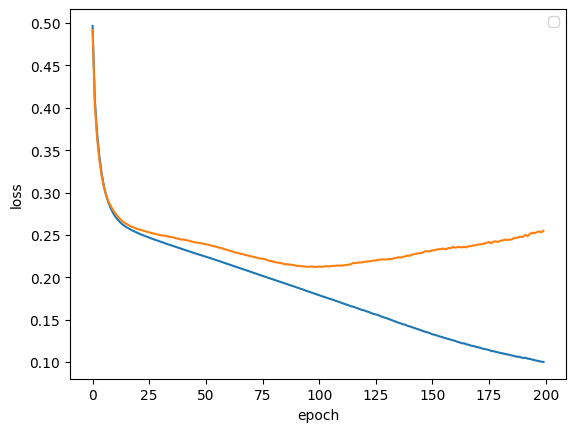

In [63]:
plt.plot(training_losses)
plt.plot(val_losses)
plt.legend('train loss', 'val loss')
plt.xlabel('epoch')
plt.ylabel('loss')

In [77]:
print(X_train.dtypes)
print(y_train.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
mso2                    float64
dtype: object
category
